<a href="https://colab.research.google.com/github/Fatai-soliu/10Analytics-Hackathon/blob/main/Main_Code_Online_Shoppers_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Online** **Shoppers** **Intention** **Prediction**

> Date Source: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset





In [34]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [3]:
  import pandas as pd

In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['online_shoppers_intention.csv']))

In [5]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
## Checking for Null values

data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


There is no null values

In [9]:
data.shape

(12330, 18)

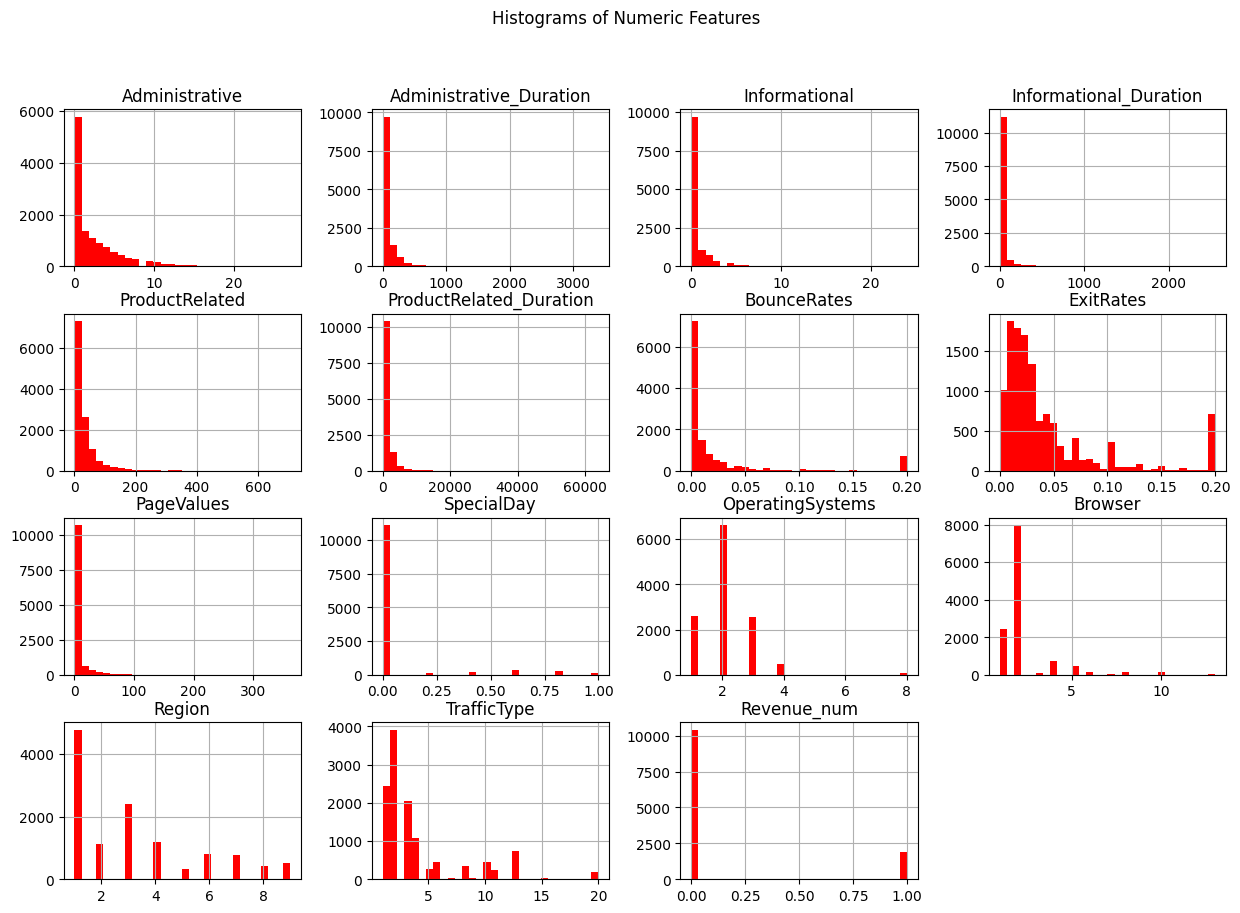

In [10]:
## Distribution of Numeric features

## convert revenue (bool) to number
data['Revenue_num'] = data['Revenue'].astype(int)

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns


data[numeric_cols].hist(bins=30, figsize=(15,10), color = "red")
plt.suptitle('Histograms of Numeric Features')
plt.show()

The numeric distribution above shows that the numeric feature (bounce rate, duration, exit rates, pagevalues and Revenue_num) are right
-skewed showing potential outlier in the data

## Outlier Detection

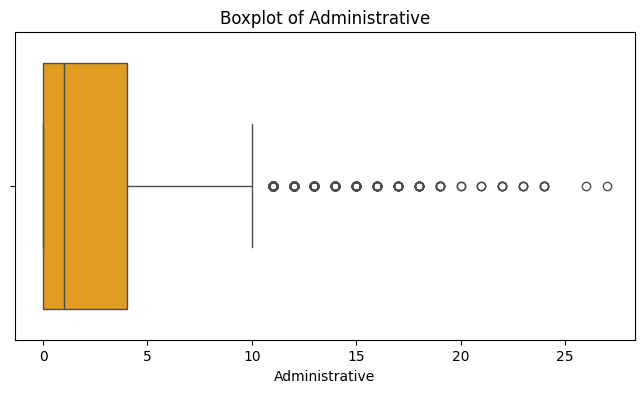

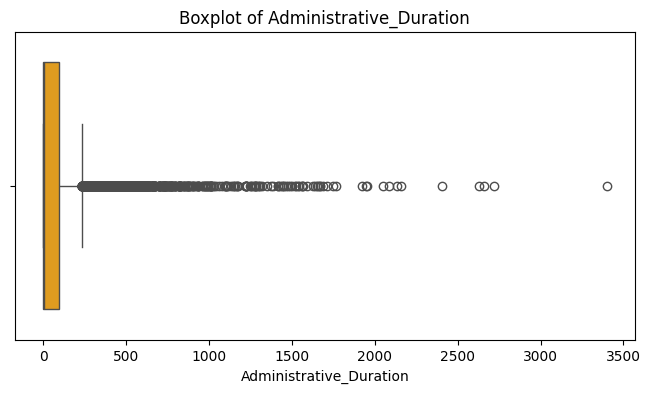

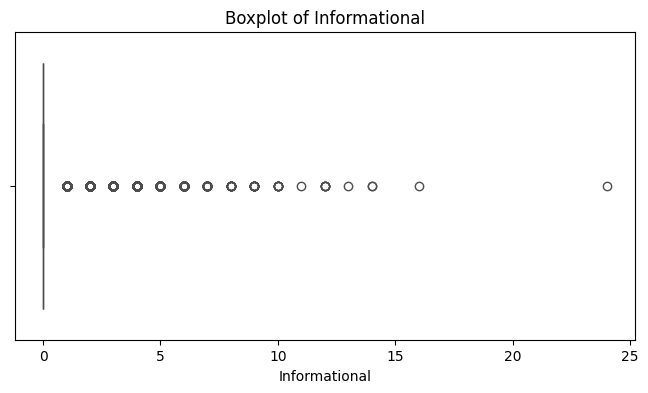

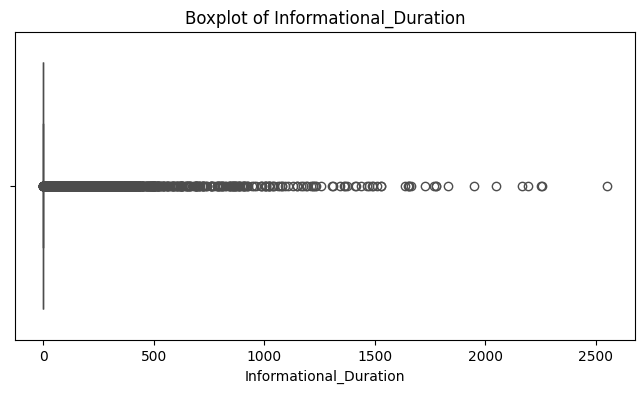

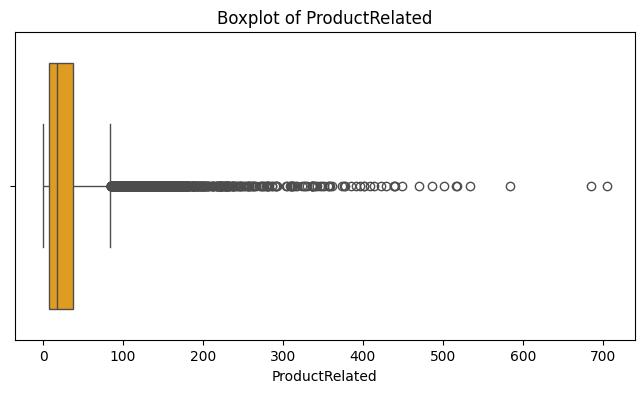

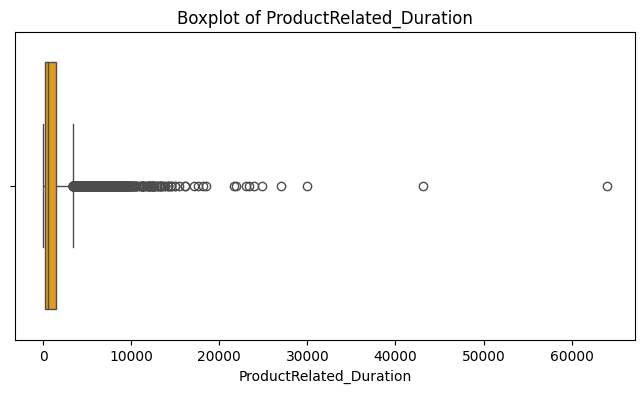

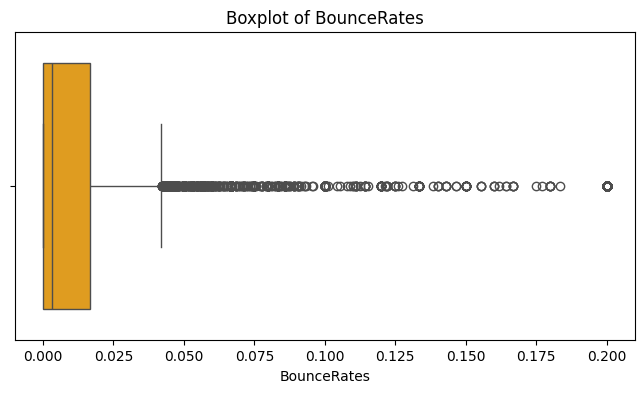

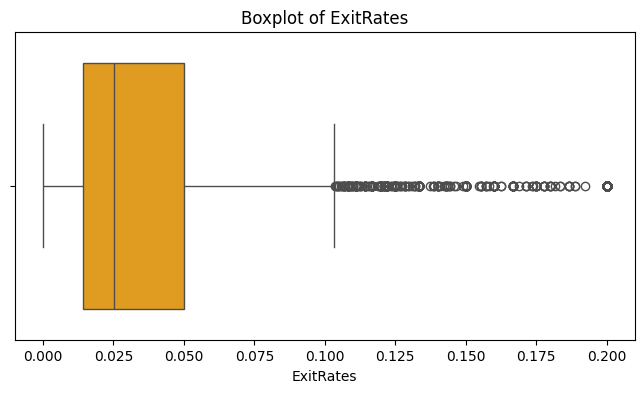

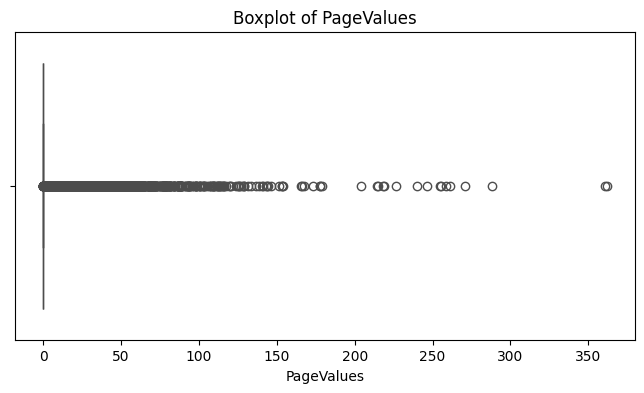

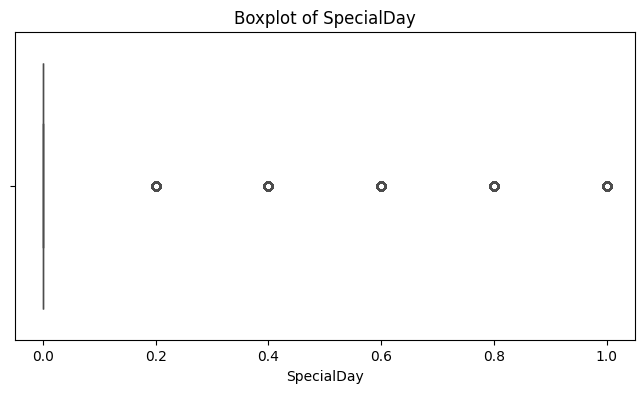

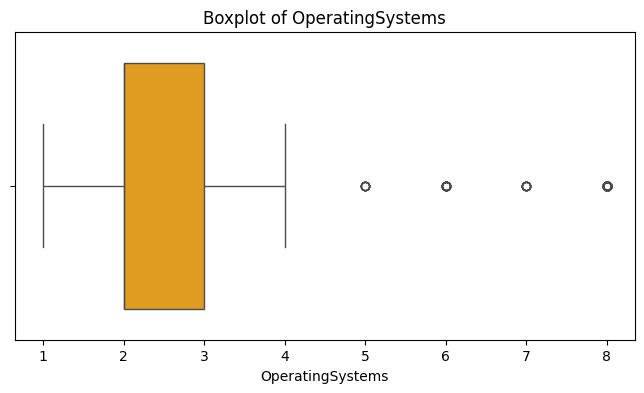

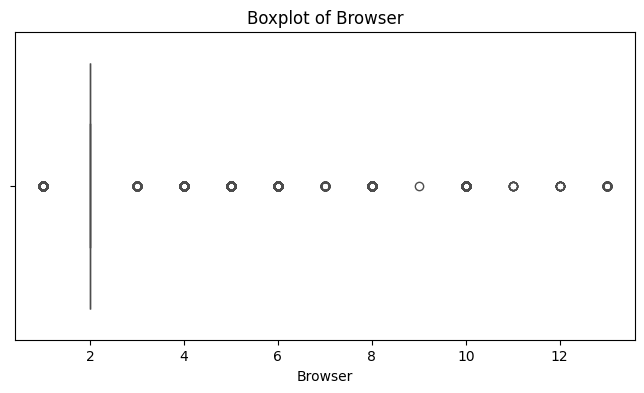

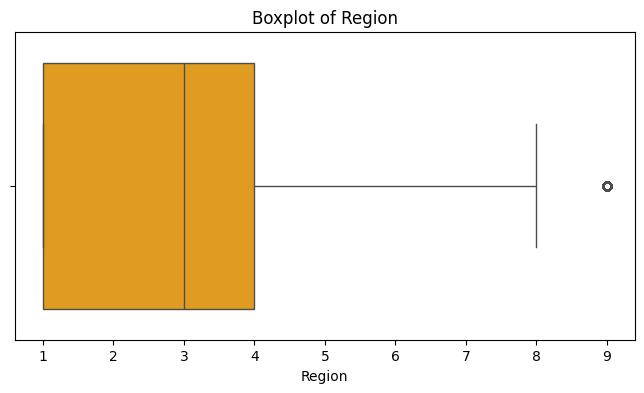

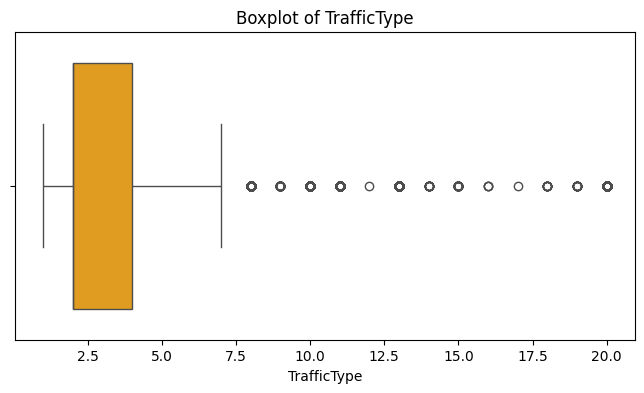

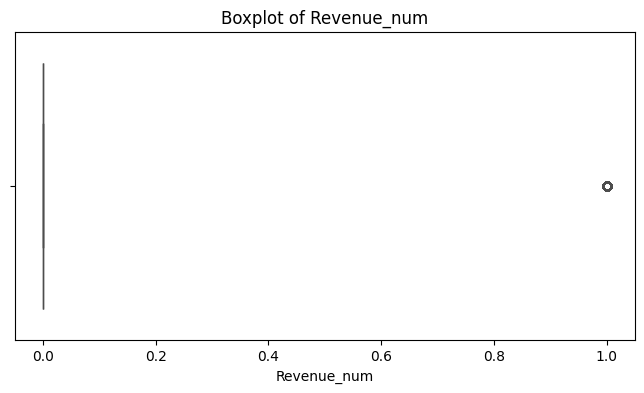

In [11]:
## Outlier detection

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col], color = "orange")
    plt.title(f"Boxplot of {col}")
    plt.show()

## Webpage Analysis

#### Important information

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action

In [12]:
## 26 pages on admistrative??

print(f"Adminstrative: {data['Administrative'].nunique()}")  ## Up to 27 unique pages on Adminstrative column
print(f"Informational: {data['Informational'].nunique()}")    ## Up to 17 unique pages on Informatonal column
print(f"Product Related: {data['ProductRelated'].nunique()}")   ## Up to 311 unique pages on product related column

Adminstrative: 27
Informational: 17
Product Related: 311


There are 27 unique pages on Administrative type page visited by the visitor. similarly, there are 17 unique pages for Informational type pages while Product related pages are a lot (signifies the users visited alot of product pages, this make sense since we are trying to track purchase intention and they must have interacted with several products and multiple product pages)


### What's next?  Let's investigate each page type and see their relationship with our target variables (revenue)

In [13]:
## Average time (duration) spent on each pages
df = data.iloc[:, 2:4]

#df.groupby("Administrative").mean().sort_values('Administrative_Duration', ascending=False)
df.groupby("Informational").mean().sort_values('Informational_Duration', ascending=False)
##df.groupby("ProductRelated").mean().sort_values('ProductRelated_Duration', ascending=False)

,Informational_Duration
Informational,
24,2050.433333
13,1949.166667
11,1258.833333
16,1210.397619
14,893.783334
9,705.293704
12,651.145476
10,602.566667
8,503.889031


In [14]:
## Frequency count

import matplotlib.pyplot as plt

def value_counts_categorical_extended(df):
    # Explicitly include known categorical-like numeric columns
    additional_categorical = ['Administrative', 'Informational', 'ProductRelated']

    # Identify categorical columns automatically + add specific ones
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    categorical_cols += [col for col in additional_categorical if col in df.columns]

    # Plot bar charts for each
    for col in categorical_cols:
        counts = df[col].value_counts()
        plt.figure(figsize=(8, 4))
        counts.plot(kind='bar', color='red')
        plt.title(f"Value Counts for '{col}'")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


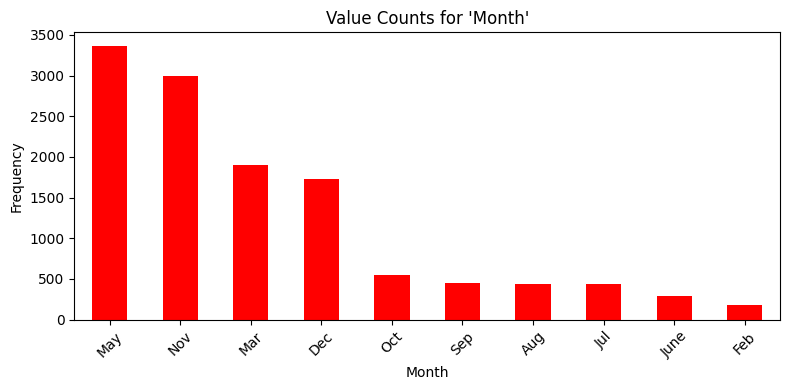

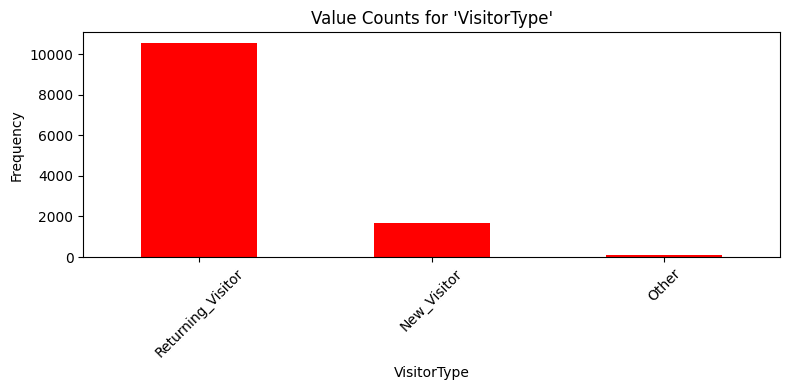

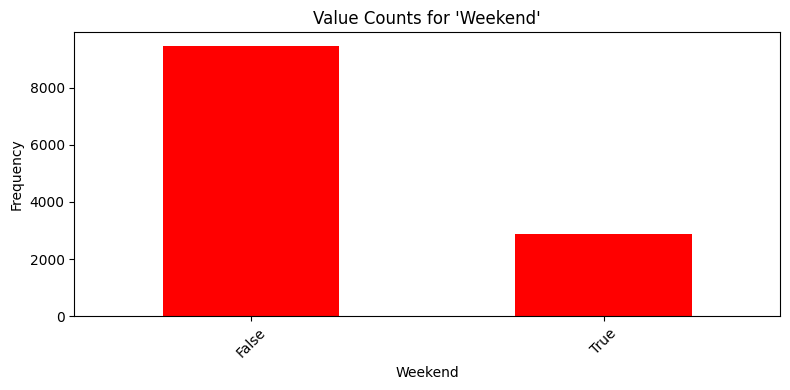

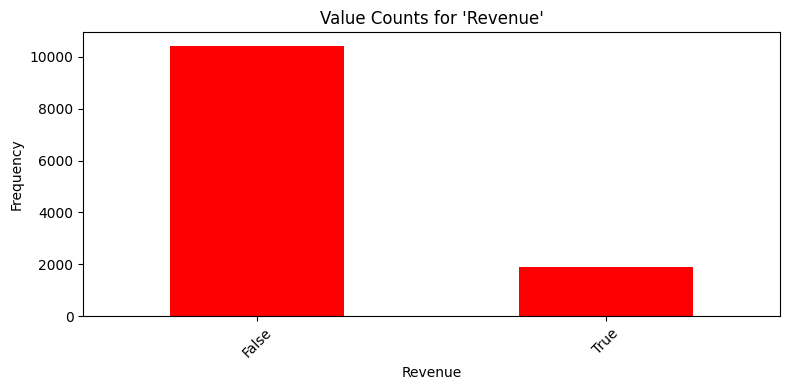

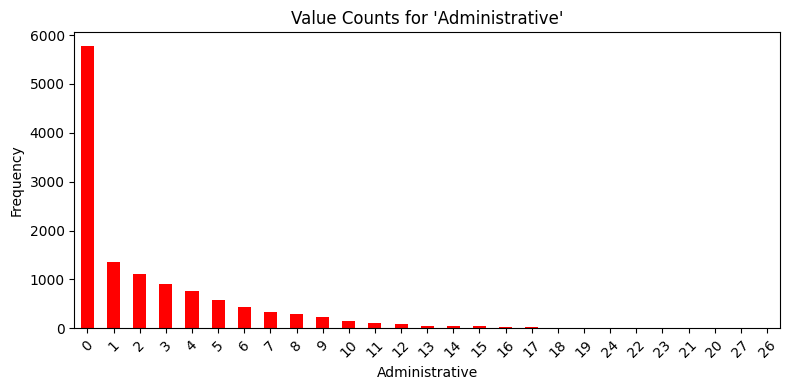

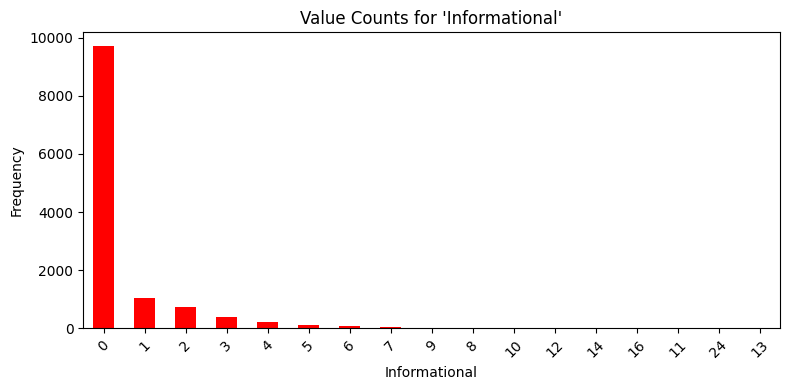

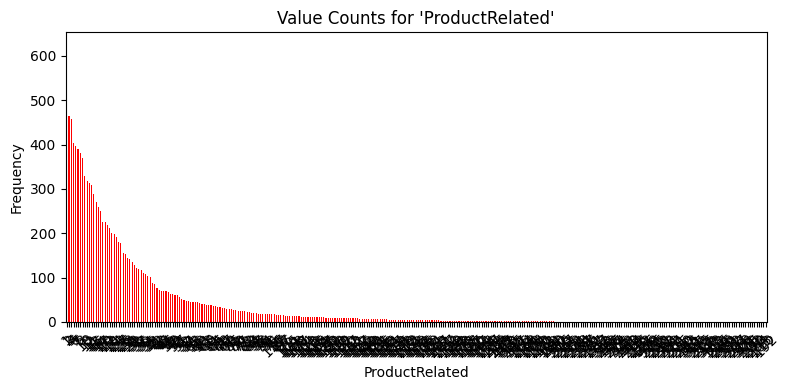

In [15]:
value_counts_categorical_extended(data)


From the frquency count below, it can be found that

1.Not all the pages have traffic, some of it have very low traffic compared to others
2. The first few pages has the most traffic (0 - 5) on adminstrative and informational respectively

3. Let's check the Bounce rate for each of the pages and see if it decreases over the pages categories

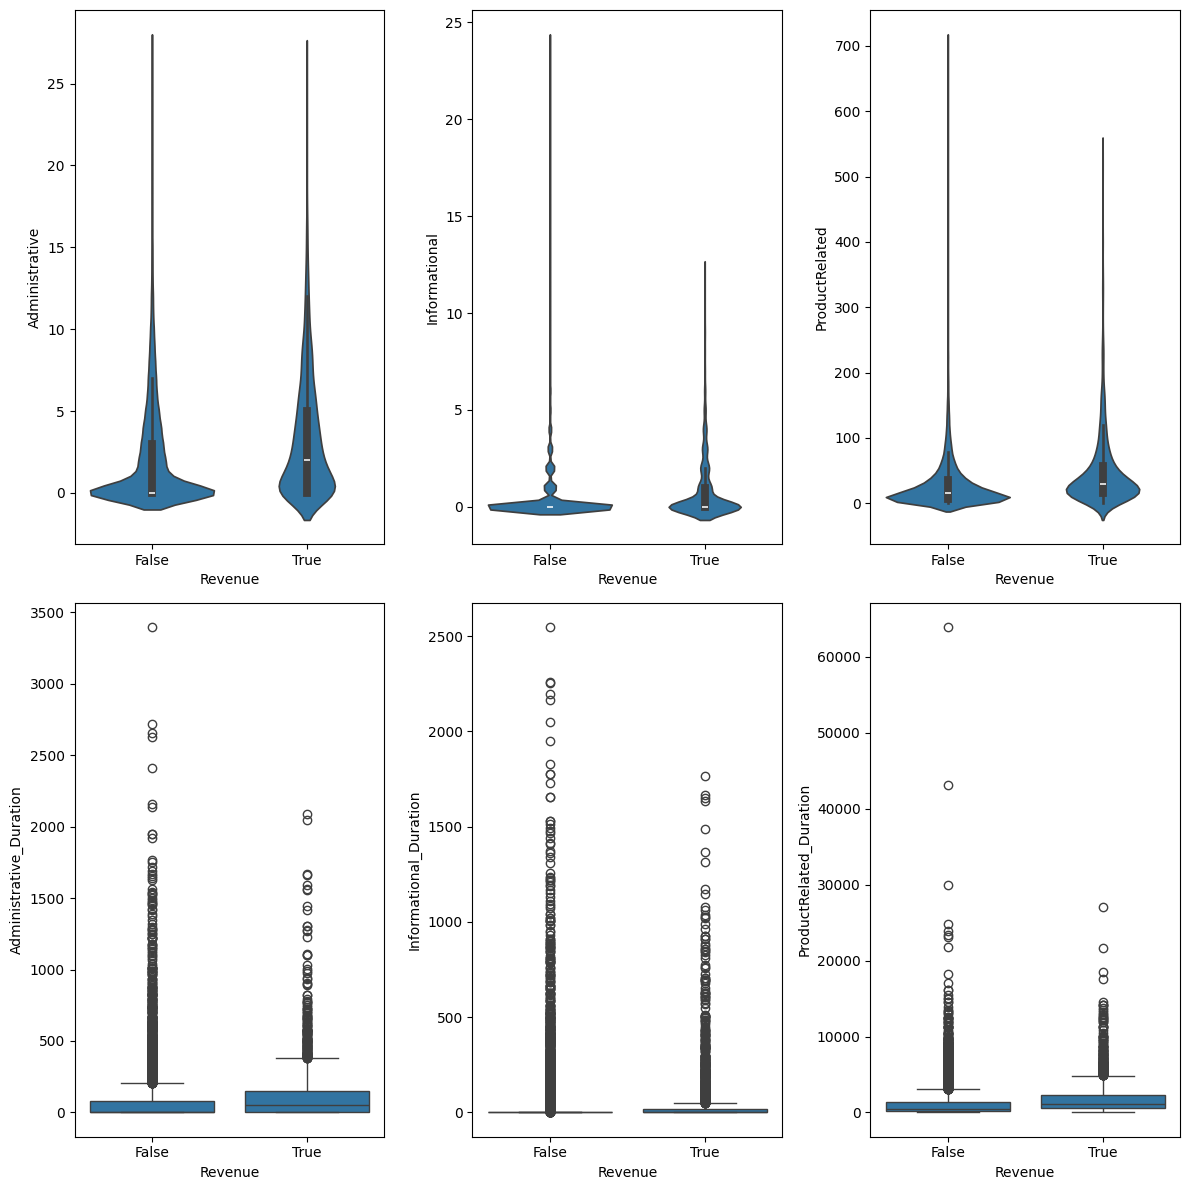

In [16]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:

- In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
- The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
- The first 3 feature look like they follow a skewed normal distribution.

In [17]:
## Check the bounce rate against the columns

import matplotlib.pyplot as plt

def bounce_rate_calc(df):
    # Explicitly include known categorical-like numeric columns
    additional_categorical = ['Administrative', 'Informational', 'ProductRelated']

    # Identify categorical columns automatically + add specific ones
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    categorical_cols += [col for col in additional_categorical if col in df.columns]

    # For each categorical column, calculate mean bounce rate and plot
    for col in categorical_cols:
        mean_bounce = df.groupby(col)["BounceRates"].mean().sort_values(ascending=True) * 100
        plt.figure(figsize=(8, 4))
        mean_bounce.plot(kind='barh', color='red')
        plt.title(f"Mean Bounce Rate by '{col}'")
        plt.xlabel("Mean Bounce Rate")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

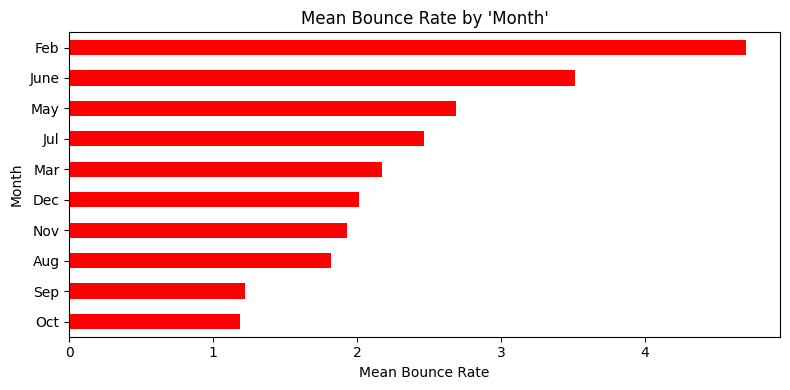

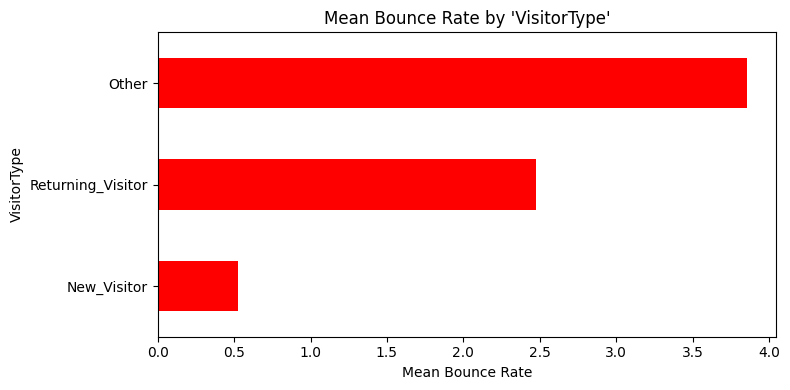

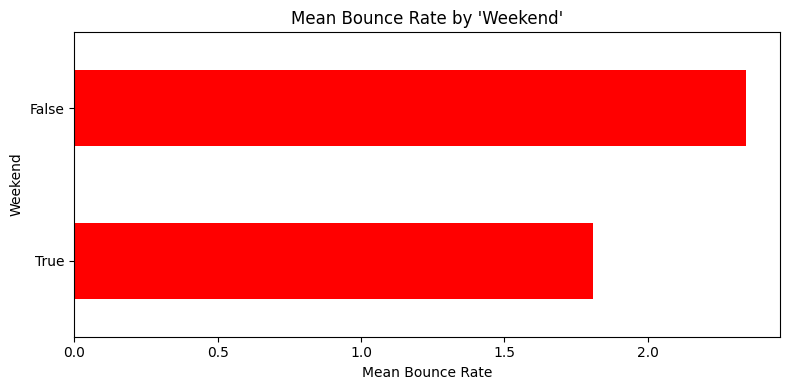

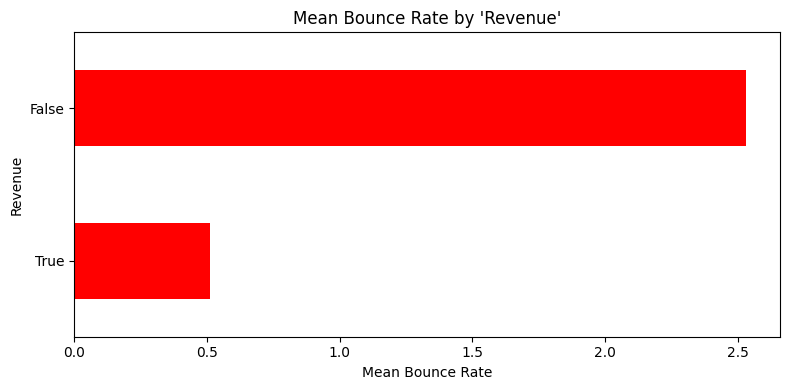

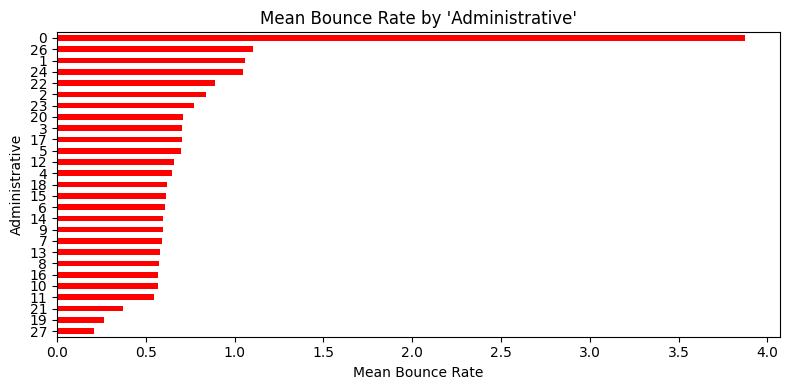

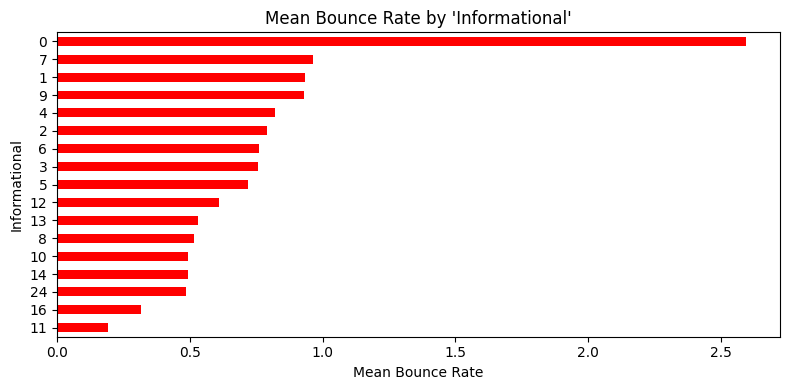

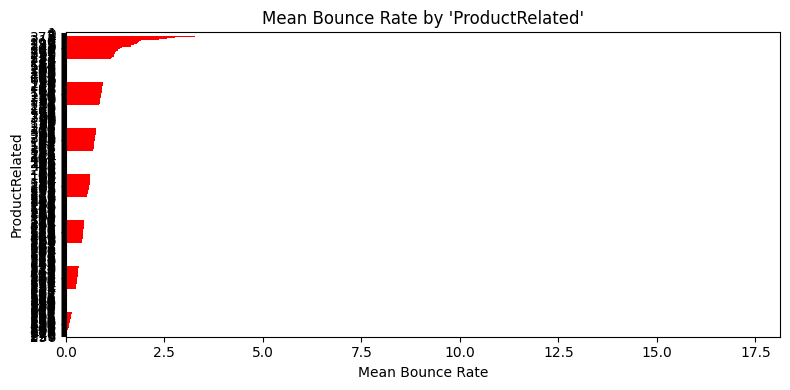

In [18]:
bounce_rate_calc(data)

Bounce rate is not sequential or by pages, so I believe the pages categories tho are in sequential doesn't signify a sequential step

i.e pages are independent of each other and are not in step like page 1 flow to page 2 etc.

other important observation

1. page id 0 for both informational and admistrative has the highest bounce rate
reason: most likely because it has the highest traffic

2. However, some interesting observation, apart from page 0, bounce rate varies randomly accross all other pages (doesn't follow a sequential pattern)

## Page Metrics Analysis

/tmp/ipython-input-1159340205.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BounceRates'], bins=20, ax=ax1)
/tmp/ipython-input-1159340205.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ExitRates'], bins=20, ax=ax2)
/tmp/ipython-input-1159340205.py:9: UserWarning: 

`distpl

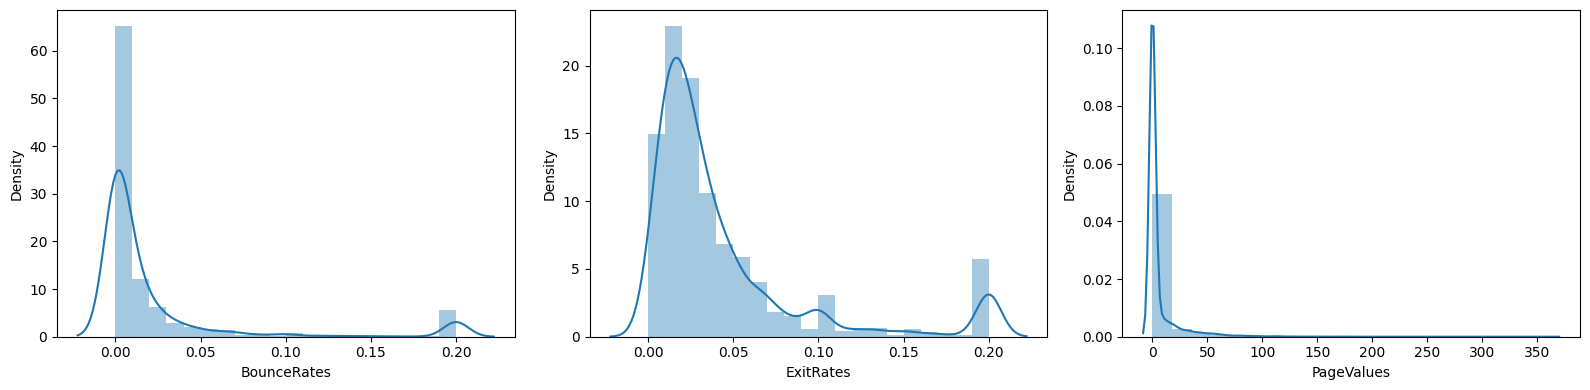

In [19]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(data['BounceRates'], bins=20, ax=ax1)
sns.distplot(data['ExitRates'], bins=20, ax=ax2)
sns.distplot(data['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

Insights from the Visualizations of Three Google Analytics Metrics:

- Bounce Rates and Page Values do not follow a normal distribution.

- All three features exhibit right-skewed distributions.

- There are a significant number of outliers present across all distributions.

- The average bounce and exit rates are relatively low for most data points — a positive sign indicating that visitors are generally engaging with the website.

- Exit rates tend to have more high values compared to bounce rates, which is expected. For instance, transaction confirmation pages naturally have high exit rates since they are typically the final step in a user’s journey.

- Bounce rate refers to the percentage of sessions where the first page visited was also the only page visited.

- Exit rate refers to the percentage of sessions in which a specific page was the last page visited, relative to all visits to that page.

In [20]:
import matplotlib.pyplot as plt

def bounce_and_exit_rate_calc(df):
    # Explicitly include known categorical-like numeric columns
    additional_categorical = ['Administrative', 'Informational', 'ProductRelated']

    # Identify categorical columns automatically + add specific ones
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    categorical_cols += [col for col in additional_categorical if col in df.columns]

    for col in categorical_cols:
        # Calculate mean bounce and exit rates (%)
        means = df.groupby(col)[["BounceRates", "ExitRates"]].mean() * 100

        # Sort by BounceRates ascending
        means = means.sort_values(by="BounceRates", ascending=True)

        # Plot grouped bar chart
        plt.figure(figsize=(10, 5))
        means.plot(kind="barh", color=["red", "orange"])
        plt.title(f"Mean Bounce and Exit Rate (%) by '{col}'")
        plt.xlabel("Percentage (%)")
        plt.ylabel(col)
        plt.legend(["Bounce Rate", "Exit Rate"])
        plt.tight_layout()
        plt.show()

<Figure size 1000x500 with 0 Axes>

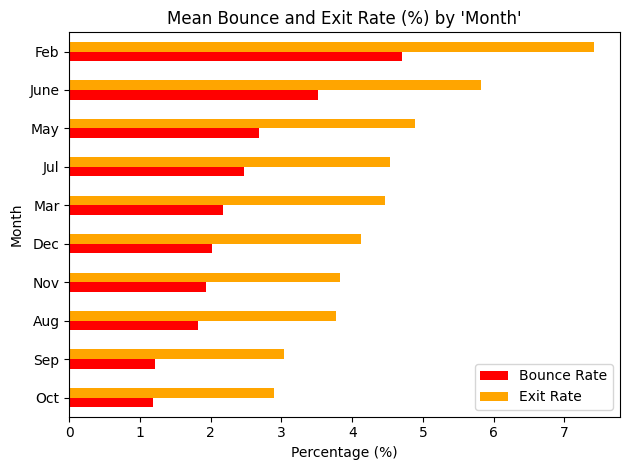

<Figure size 1000x500 with 0 Axes>

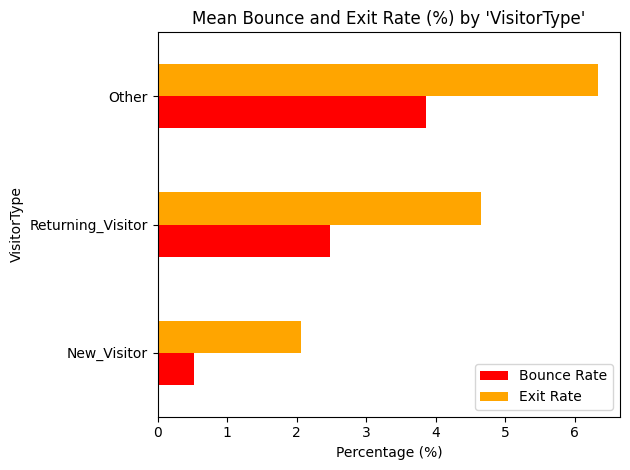

<Figure size 1000x500 with 0 Axes>

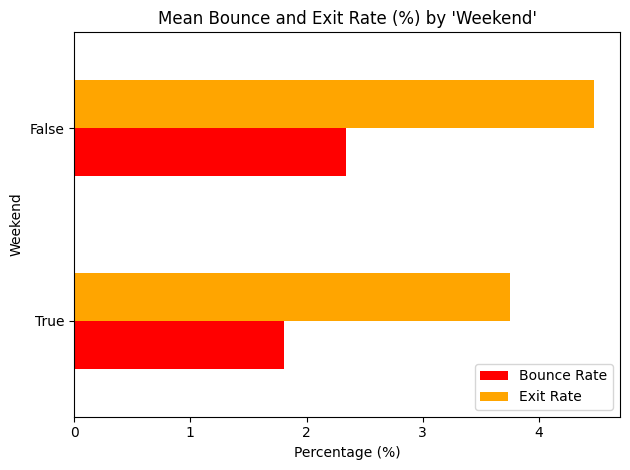

<Figure size 1000x500 with 0 Axes>

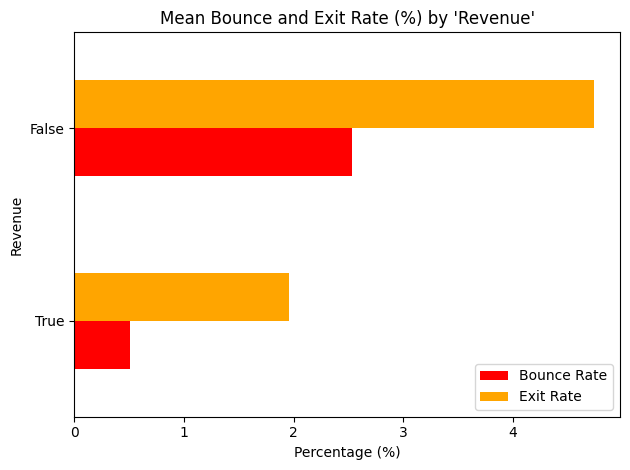

<Figure size 1000x500 with 0 Axes>

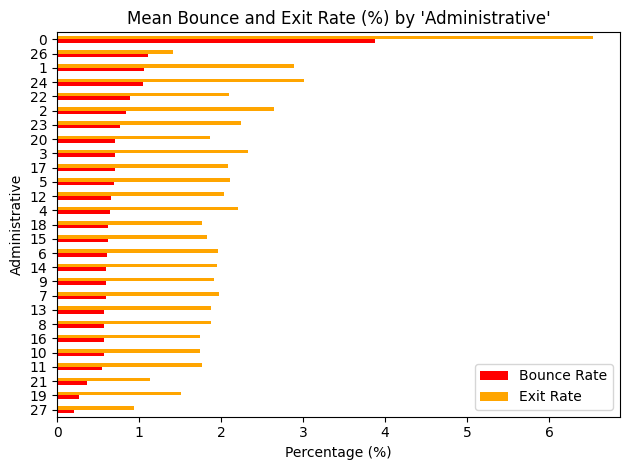

<Figure size 1000x500 with 0 Axes>

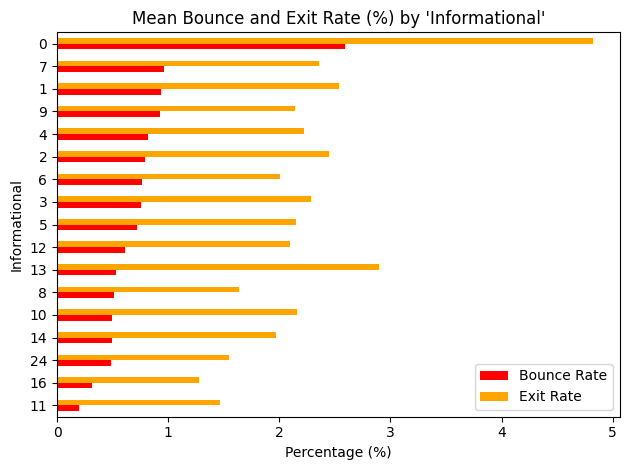

<Figure size 1000x500 with 0 Axes>

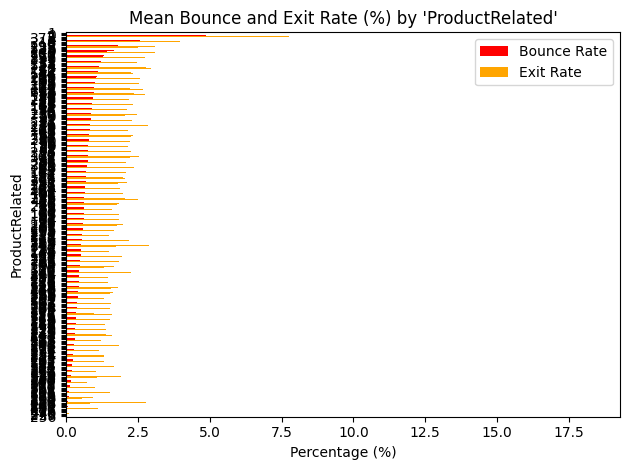

In [21]:
bounce_and_exit_rate_calc(data)

#### My hypothesis is that majority of the informational and administrative page category will have false under revenue column  - Let's check



> Results show there are some page ID for informational and adminstrative page that actually have purchase



In [22]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue_num
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


# Revenue Analysis - Target Variable

In [23]:
def revenue_calc(df):
    additional_categorical = ['Administrative', 'Informational', 'ProductRelated']


    # Identify categorical columns automatically + add specific ones
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols += [col for col in additional_categorical if col in df.columns]

    for col in categorical_cols:
        # Calculate count
        counts = df.groupby([col, "Revenue"]).size().unstack(fill_value=0)


        # Plot grouped bar chart
        plt.figure(figsize=(10, 5))
        counts.plot(kind="bar", color=["red", "orange"])
        plt.title(f"Purchase count by '{col}'")
        plt.xlabel("Percentage (%)")
        plt.ylabel(col)
        plt.legend(["No Purchases", "Yes Purchases"])
        plt.tight_layout()
        plt.show()

<Figure size 1000x500 with 0 Axes>

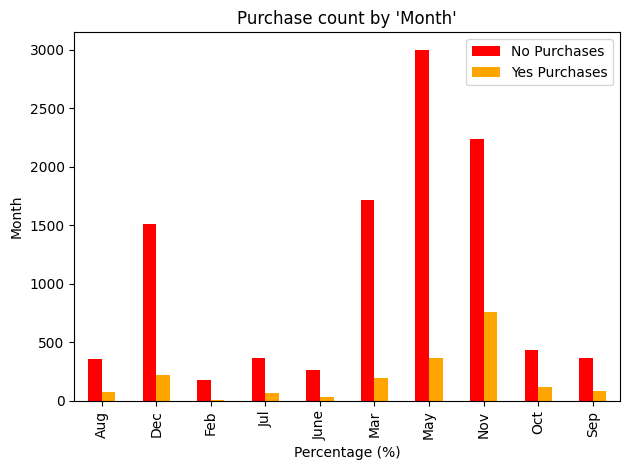

<Figure size 1000x500 with 0 Axes>

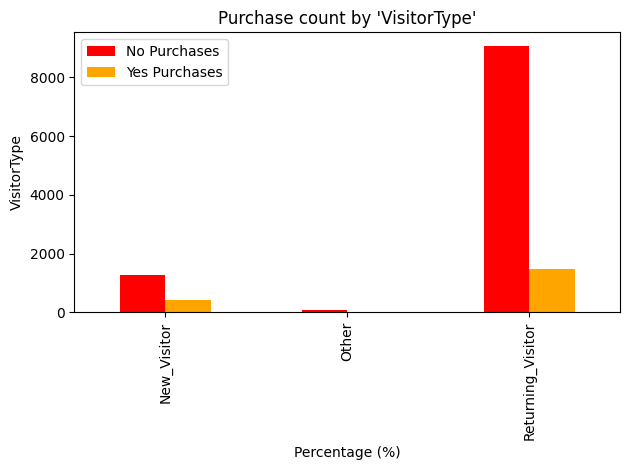

<Figure size 1000x500 with 0 Axes>

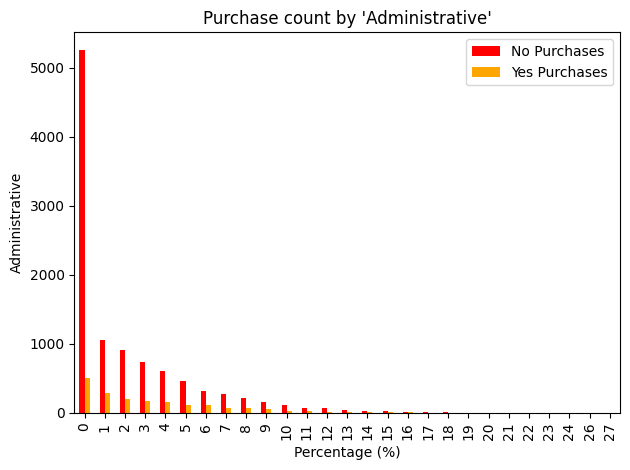

<Figure size 1000x500 with 0 Axes>

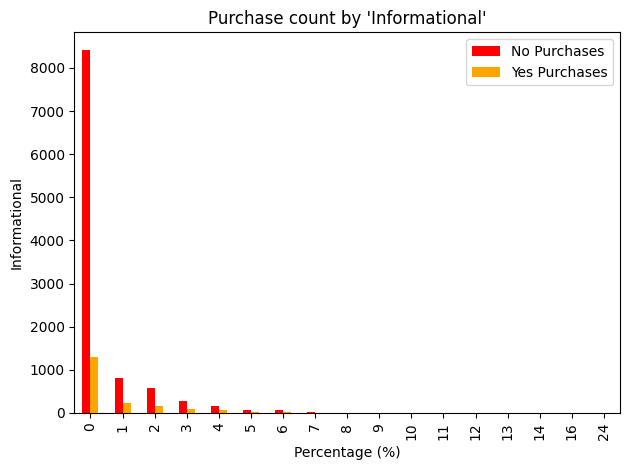

<Figure size 1000x500 with 0 Axes>

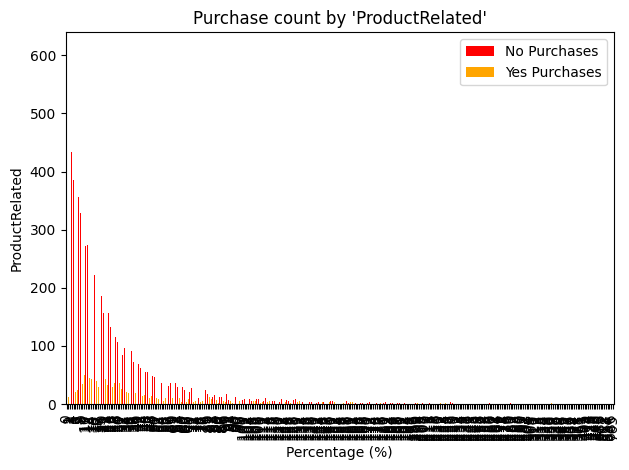

In [24]:
revenue_calc(data)

## Correlation Analysis

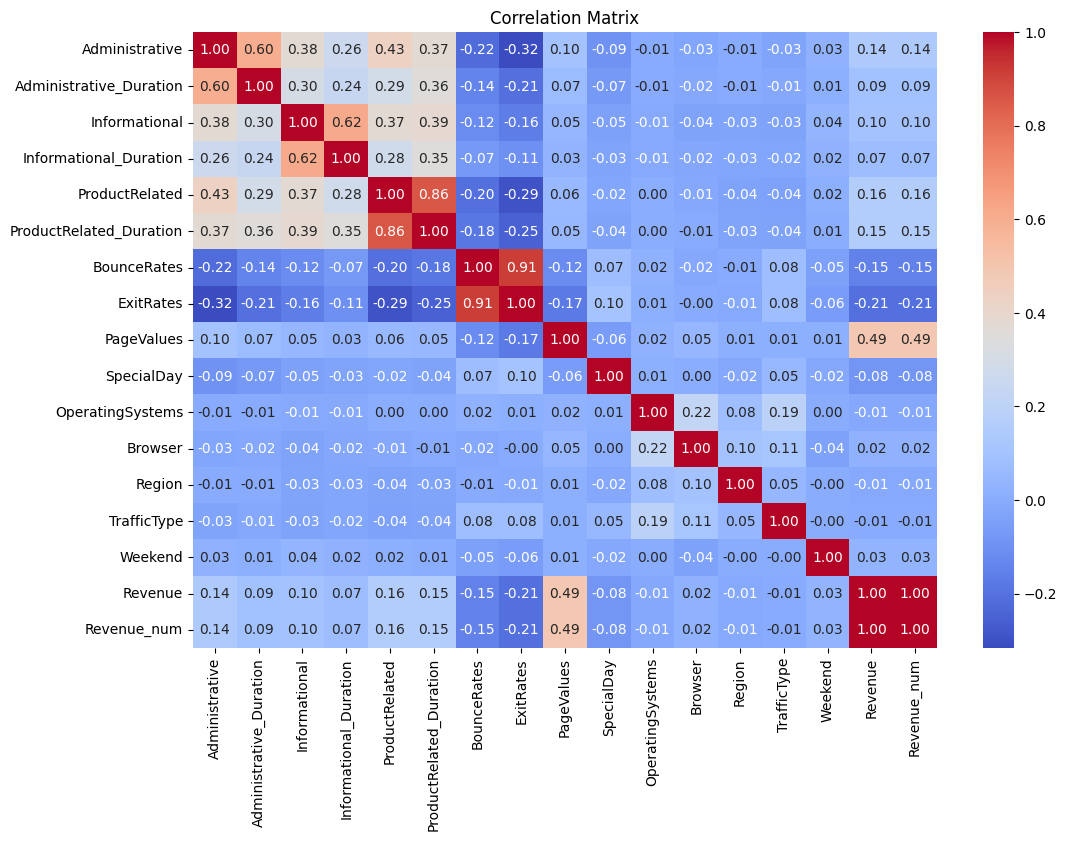

In [25]:
## Now, let's check the relationship among all features

corr = data.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Zooming into the features with positive correlation with Revenue (i.e purchases)

PageValues has a mid positive correlation, followed by ProductRelated and productrelated and then Adminstrative.

They all have low positive correlation (0.16, 0.15, 0.14 respectively)

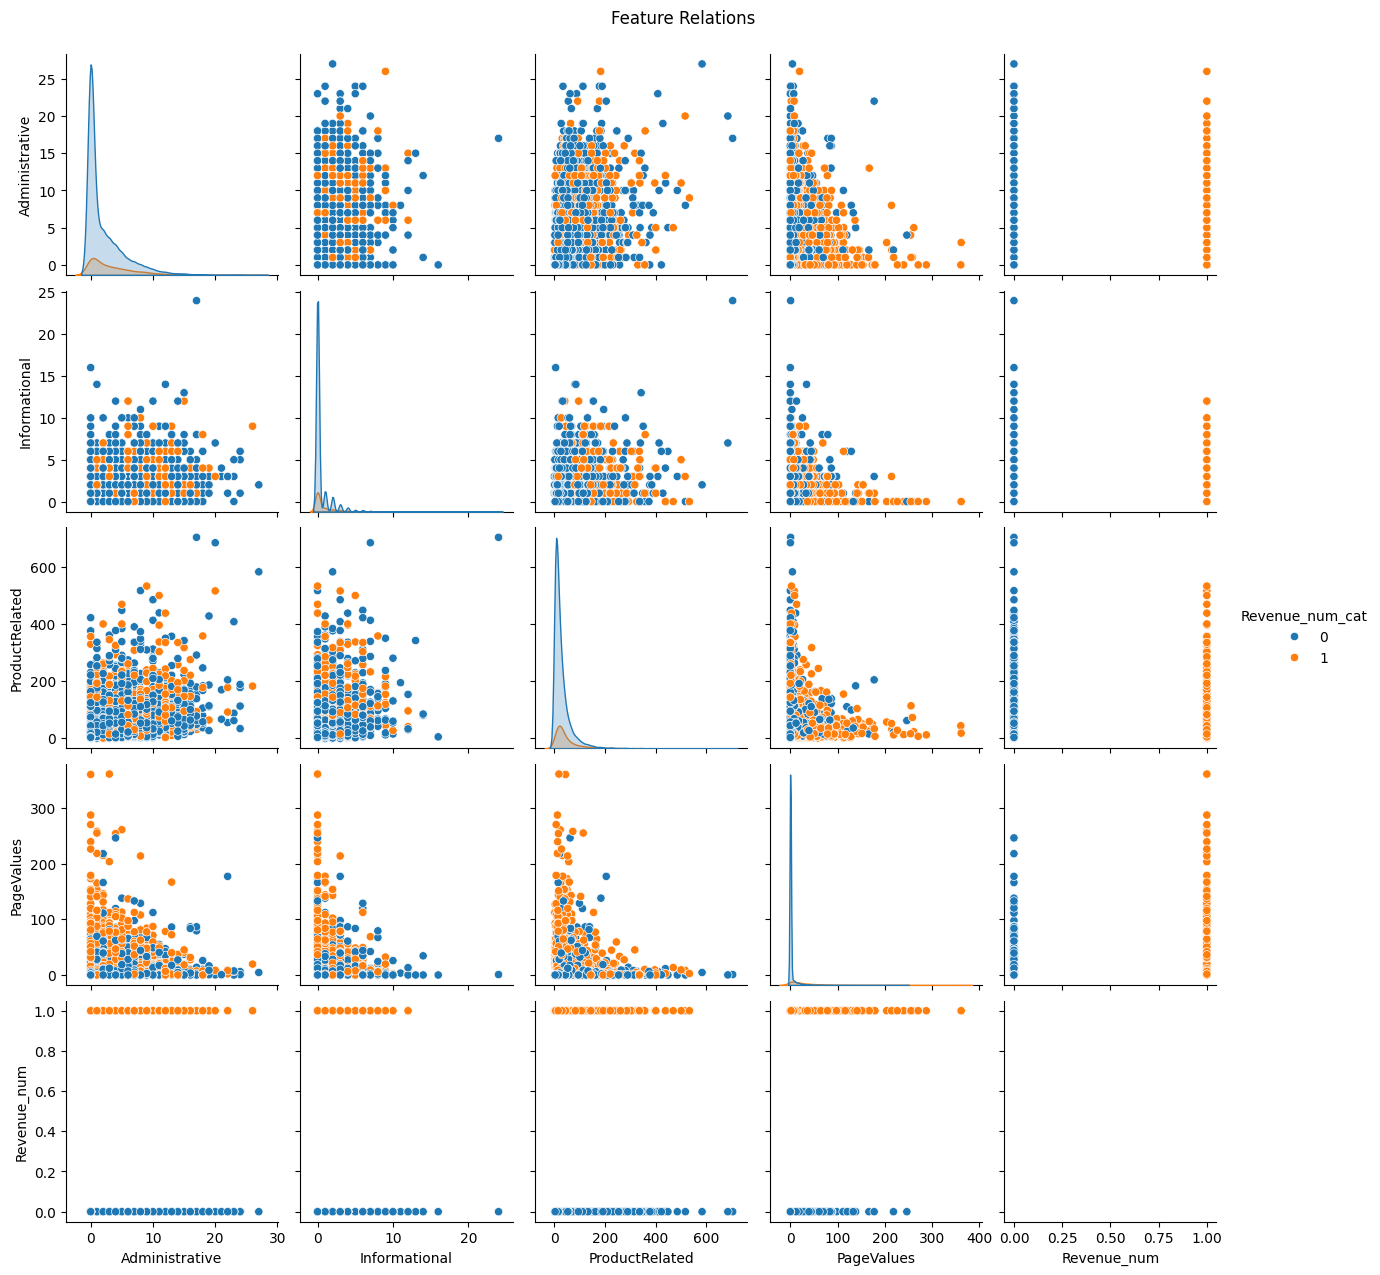

In [26]:
## Correlation among a few of the features

data['Revenue_num_cat'] = data['Revenue_num'].astype('category')

g1 = sns.pairplot(
    data[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue_num', 'Revenue_num_cat']],
    hue='Revenue_num_cat'
)
g1.fig.suptitle('Feature Relations', y=1.02)
plt.show()

From the above figure, we can see:

- No strong correlation between Revenue (our target) and any other feature.
- A strong negative correlation between PageValues and other features shown.

## Treating Outlier

An outlier is a data point that is significantly different from the rest of the data. It lies far outside the normal range of values and may indicate variability, errors, or rare events.

In other to reduce skewness, I will apply logarithmic transformation to the follow features.

In [27]:
data['Administrative_Duration_log'] = np.log1p(data['Administrative_Duration'])
data['PageValues_log'] = np.log1p(data['PageValues'])
data['Informational_Duration_log'] = np.log1p(data['Informational_Duration'])
data['ProductRelated_Duration_log'] = np.log1p(data['ProductRelated_Duration'])
data['ProductRelated_log'] = np.log1p(data['ProductRelated'])


## Feature Engineering

Feature engineering is a key part of improving model's performance by generating new, informative features

## Data Transformation

In [28]:
Tdata = pd.concat([data,pd.get_dummies(data['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
Tdata = pd.concat([Tdata,pd.get_dummies(Tdata['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(Tdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Administrative                 12330 non-null  int64   
 1   Administrative_Duration        12330 non-null  float64 
 2   Informational                  12330 non-null  int64   
 3   Informational_Duration         12330 non-null  float64 
 4   ProductRelated                 12330 non-null  int64   
 5   ProductRelated_Duration        12330 non-null  float64 
 6   BounceRates                    12330 non-null  float64 
 7   ExitRates                      12330 non-null  float64 
 8   PageValues                     12330 non-null  float64 
 9   SpecialDay                     12330 non-null  float64 
 10  OperatingSystems               12330 non-null  int64   
 11  Browser                        12330 non-null  int64   
 12  Region                         1

In [29]:
Tdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


## Data Splitting

In [30]:
y = Tdata['Revenue']
X = Tdata.drop(['Revenue'], axis=1)

The transformed data is not splitted to X and y
X = independent variables (features)
y =  target variables

In [32]:
## Train-Test- Val Split

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=10)

X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=10)

To run the analysis, we splitted the data into train, test and validation subset in the following proportion

1. Train data (X_train) and train lables (y_train) ==> 70%
2. Validation data (X_val) and validation lables (y_val) ==> 15%
3. Test data (X_test) and test labels (y_test) ==> 15%

## Data Scaling

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
799,10,316.140503,7,321.666667,287,12983.787710,0.000669,0.006998,1.088158,0.0,...,False,False,True,False,False,False,False,True,False,False
6161,9,501.483333,0,0.000000,97,2293.490129,0.011456,0.026971,2.209973,0.0,...,False,False,False,False,False,False,False,False,False,True
6784,0,0.000000,0,0.000000,8,32.200000,0.125000,0.150000,0.000000,0.0,...,False,True,False,False,False,False,False,False,False,True
7994,5,209.625000,2,118.750000,21,398.000000,0.006897,0.021839,0.000000,0.0,...,False,False,False,False,False,False,False,True,False,False
2685,0,0.000000,0,0.000000,6,387.000000,0.133333,0.166667,0.000000,0.0,...,False,False,False,True,False,False,False,False,False,True


In [41]:
X_train_scaled[0]

array([ 2.3083308 ,  1.30133652,  5.02284934,  2.03773808,  5.54064446,
        5.86150635, -0.44520599, -0.74327962, -0.26001718, -0.31330949,
       -0.13196854,  0.96960732, -0.06830319,  0.97941275, -0.55240973,
       -0.42567137, -0.42567137,  1.45963226,  0.09034581,  2.7295147 ,
        1.71479347,  2.45130087, -0.19204507, -0.39873575, -0.12366211,
       -0.19333858, -0.16021376,  2.36401134, -0.61346191, -0.57311368,
       -0.21043555, -0.19398257,  2.51655521, -0.08225221, -2.44717469])

## Handling Class Imbalance - using SMOTE

Class imbalance happens when the number of examples in each class of your dataset is not roughly equal. In binary classification, that usually means one class (like "no purchase") is much more common than the other (like "purchase") which was seen in this dataset

SMOTE relies on k-nearest neighbors, which uses Euclidean distance to generate synthetic samples.

If features are not on the same scale, the distance calculations will be distorted, and SMOTE will generate poor synthetic samples.

In [42]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [45]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({False: 7307, True: 1324})
After SMOTE: Counter({False: 7307, True: 7307})


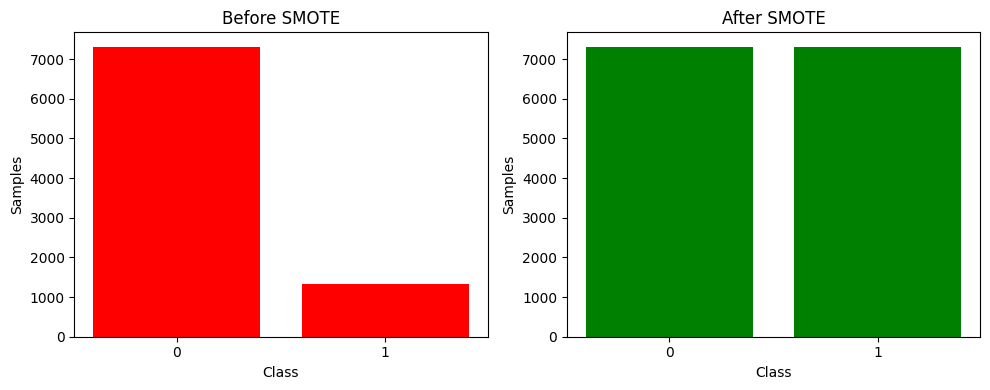

In [46]:
# Count class distribution
before_counts = Counter(y_train)
after_counts = Counter(y_train_res)

# Bar plot to visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(before_counts.keys(), before_counts.values(), color='red')
axes[0].set_title("Before SMOTE")
axes[0].set_xticks([0, 1])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Samples")

axes[1].bar(after_counts.keys(), after_counts.values(), color='green')
axes[1].set_title("After SMOTE")
axes[1].set_xticks([0, 1])
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Samples")

plt.tight_layout()
plt.show()

The application of SMOTE has fix class imbalance

## Experiment 1: Baseline model (Random Forest & XGboost)

- All features
- Default hyperparameters


1. Random Forest Classifier

In [47]:
## 1. Train Random Forest

rf_exp1 = RandomForestClassifier(random_state=20)
rf_exp1.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=20)

2. XGBoost Classifier

In [49]:
## Train XGBoost

xgb_exp1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=20)
xgb_exp1.fit(X_train_res, y_train_res)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:31:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

  3. Model Evaluation - confusion matrix

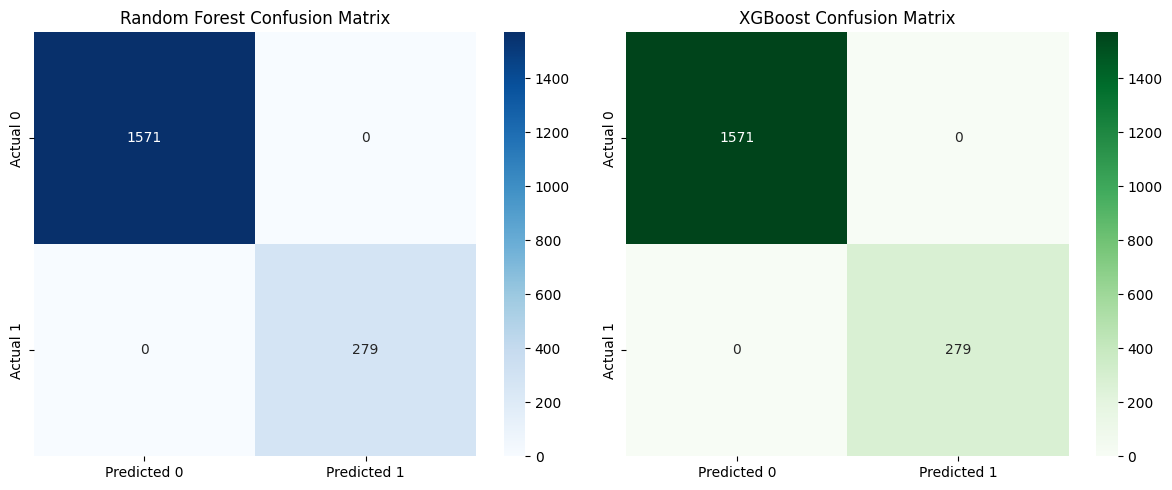

In [52]:
# Get predictions from your trained models
y_pred_rf = rf_exp1.predict(X_test_scaled)
y_pred_xgb = xgb_exp1.predict(X_test_scaled)

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create labeled DataFrames
df_cm_rf = pd.DataFrame(cm_rf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
df_cm_xgb = pd.DataFrame(cm_xgb, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(df_cm_rf, annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(df_cm_xgb, annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")

plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import classification_report
import pandas as pd

# Get predictions
y_pred_rf = rf_exp1.predict(X_test_scaled)
y_pred_xgb = xgb_exp1.predict(X_test_scaled)

# Generate classification reports
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Convert to DataFrames
df_report_rf = pd.DataFrame(report_rf).transpose()
df_report_xgb = pd.DataFrame(report_xgb).transpose()

# Display
print("Random Forest Classification Report")
display(df_report_rf)

print("\nXGBoost Classification Report")
display(df_report_xgb)

Random Forest Classification Report


,precision,recall,f1-score,support
False,1.0,1.0,1.0,1571.0
True,1.0,1.0,1.0,279.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1850.0
weighted avg,1.0,1.0,1.0,1850.0



XGBoost Classification Report


,precision,recall,f1-score,support
False,1.0,1.0,1.0,1571.0
True,1.0,1.0,1.0,279.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1850.0
weighted avg,1.0,1.0,1.0,1850.0


Summary: Experiment 1

Both Random Forest and XGBoost achieved 100% accuracy, precision, recall, and F1-score across both classes. This unusually high performance suggests the possibility of data leakage or a classification problem, warranting further investigation.